<a href="https://colab.research.google.com/github/amartsin/Credicxo-Task/blob/main/Credicxo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('musk_csv.csv')

In [5]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
df['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-308        2
MUSK-300            2
NON-MUSK-305        2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64

In [7]:
df.corr().abs() #Columns with high correlation will be dropped because,then we can predict using very few columns

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,1.000000,0.197844,0.119750,0.179274,0.248703,0.106119,0.165094,0.140705,0.430635,0.179556,0.028260,0.427975,0.342264,0.209379,0.461400,0.470128,0.238941,0.052881,0.284038,0.397699,0.296732,0.079327,0.174111,0.073456,0.022197,0.117705,0.198410,0.040396,0.066798,0.164355,0.094984,0.145880,0.020437,0.006309,0.104532,0.123206,0.033078,0.287410,0.084612,0.078497,...,0.099457,0.022852,0.178133,0.011888,0.310232,0.006023,0.292567,0.415369,0.208506,0.044381,0.280844,0.152511,0.023160,0.011666,0.073981,0.130339,0.143681,0.040152,0.154451,0.084384,0.242894,0.254558,0.023061,0.010038,0.164586,0.130713,0.051435,0.176425,0.020759,0.128405,0.057309,0.046844,0.224905,0.148977,0.328034,0.291805,0.039315,0.196997,0.043655,0.625410
f1,0.197844,1.000000,0.142464,0.164292,0.291054,0.001037,0.090659,0.071879,0.416191,0.090701,0.185305,0.489531,0.329323,0.145467,0.451025,0.474834,0.168133,0.061720,0.217193,0.363618,0.263439,0.064906,0.042014,0.061941,0.235260,0.241263,0.136936,0.046363,0.077570,0.146275,0.246323,0.137254,0.116489,0.063658,0.282979,0.228776,0.421946,0.168445,0.131857,0.150626,...,0.270847,0.130106,0.282326,0.188010,0.142333,0.018388,0.256826,0.394867,0.086513,0.123043,0.158354,0.119479,0.046166,0.034662,0.123627,0.113538,0.107770,0.065500,0.008926,0.088045,0.107410,0.170390,0.094255,0.167098,0.305877,0.325536,0.140517,0.102513,0.132298,0.079600,0.010485,0.146428,0.153096,0.002383,0.634797,0.061317,0.142004,0.443060,0.057199,0.120883
f2,0.119750,0.142464,1.000000,0.611675,0.244145,0.134689,0.125947,0.449526,0.187318,0.484187,0.270608,0.052151,0.023072,0.088225,0.172705,0.124140,0.053458,0.449154,0.073063,0.017114,0.182890,0.332913,0.474994,0.450216,0.284007,0.349150,0.435672,0.174971,0.087526,0.151403,0.336306,0.116604,0.189070,0.367302,0.285640,0.359259,0.067595,0.075352,0.356764,0.428873,...,0.316801,0.184939,0.306362,0.017298,0.095467,0.189755,0.067644,0.205260,0.209092,0.413138,0.152026,0.454338,0.273073,0.307311,0.316983,0.483871,0.494869,0.171277,0.019855,0.006232,0.498552,0.653606,0.242832,0.377931,0.314299,0.341124,0.752593,0.170107,0.651242,0.169423,0.172481,0.309392,0.339496,0.030338,0.118212,0.028524,0.069193,0.133091,0.046361,0.099896
f3,0.179274,0.164292,0.611675,1.000000,0.378516,0.080964,0.210432,0.754798,0.426254,0.760313,0.429700,0.154603,0.061773,0.175302,0.328917,0.266068,0.105703,0.768686,0.227777,0.046317,0.336981,0.582247,0.758838,0.731839,0.448241,0.556338,0.696615,0.328863,0.390410,0.231447,0.532059,0.040353,0.011557,0.476498,0.423300,0.512949,0.079759,0.096025,0.356355,0.769293,...,0.488989,0.274484,0.461959,0.157913,0.103619,0.306079,0.105471,0.394752,0.665088,0.600310,0.444991,0.717029,0.398967,0.488419,0.262273,0.692855,0.741012,0.122987,0.040803,0.030205,0.773667,0.721962,0.286981,0.526465,0.476550,0.509092,0.644592,0.018784,0.408260,0.291073,0.261200,0.502924,0.259424,0.020607,0.206860,0.131828,0.111005,0.086150,0.020434,0.089760
f4,0.248703,0.291054,0.244145,0.378516,1.000000,0.044896,0.222191,0.453786,0.185135,0.420407,0.559255,0.426113,0.411495,0.013106,0.263494,0.329161,0.107317,0.443540,0.149202,0.355830,0.006209,0.371661,0.475065,0.447048,0.534812,0.728112,0.330514,0.319219,0.349934,0.476369,0.741674,0.064376,0.108775,0.489964,0.701427,0.698268,0.091186,0.208231,0.238583,0.436618,...,0.731694,0.420229,0.682369,0.086018,0.169857,0.248849,0.252382,0.175814,0.228995,0.363838,0.144315,0.371451,0.240790,0.364969,0.211595,0.427092,0.450192,0.084413,0.160132,0.083617,0.163168,0.132261,0.277631,0.598446,0.725491,0.837919,0.417771,0.167011,0.261924,0.239451,0.308906,0.607435,0.279430,0.118705,0.241346,0.182826,0.189530,0.364233,0.072985,0.098592
...,...,.

In [8]:
df.isnull().sum() #finding out the number of missing values

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [9]:

#dropping columns with high correlation
cor_matrix = df.corr().abs()
#correlation will be mirror image about the diagonal and the diagonals are 1 
#thus selecting upper triangular matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

df = df.drop(columns = to_drop)
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f120,f122,f123,f124,f125,f126,f127,f129,f131,f132,f133,f134,f136,f137,f138,f139,f140,f141,f142,f145,f146,f147,f148,f149,f150,f151,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,-39,72,113,-107,80,25,-27,-114,45,-118,-75,-182,-19,12,-13,-41,-119,-149,70,-177,-101,-116,-14,-50,24,-81,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,22,131,109,-77,-10,-17,17,-21,32,-128,-72,-124,-94,53,-79,-20,-35,-26,4,-177,-102,-121,-66,-77,51,-41,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,24,122,74,-36,-129,19,41,0,-15,-129,-74,-125,-93,53,-72,-19,-33,-26,3,-177,-102,-119,-66,-81,51,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,23,131,109,-78,-12,-18,17,-20,32,-128,-73,-125,-93,53,-78,-19,-34,-26,4,-177,-101,-121,-65,-77,52,-41,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,23,131,109,-78,-12,-18,17,-20,32,-128,-73,-125,-93,53,-78,-19,-34,-26,4,-177,-101,-121,-65,-76,52,-41,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,-188,28,123,-96,115,60,144,-18,43,1,-76,-53,-23,-176,-32,-205,-95,-124,-139,-178,-102,-113,-42,-67,-141,-96,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,-188,30,129,50,-133,54,140,-6,-88,-75,-74,-55,-28,-175,-48,-202,-86,-125,-138,-178,-102,-123,-32,-52,-136,-98,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,-189,201,255,50,-132,54,4,-13,-89,-117,-57,-47,-28,-175,-50,-216,-129,-130,-138,-178,-102,-124,-32,-51,-136,-98,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,-188,197,251,-95,116,60,8,7,43,-6,-61,-47,-23,-176,-33,-212,-131,-113,-139,-178,-103,-114,-42,-66,-141,-96,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [10]:
df.shape

(6598, 138)

In [11]:
#for splitting the data 
from sklearn.model_selection import train_test_split

In [46]:
train,test = train_test_split(df, random_state=1, test_size = 0.2)


In [47]:
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape

(5278, 134)

# CNN Model

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [88]:
a=[1]*Xtrain.shape[0]
Xtrain["hello"]=a

b=[1]*Xtest.shape[0]
Xtest["hello"]=b


Xtrain.shape



(5278, 135)

In [89]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],27,5,1)
x_test=Xtest.values.reshape(Xtest.shape[0],27,5,1)

In [90]:
x_train.shape

(5278, 27, 5, 1)

In [91]:
x_test.shape

(1320, 27, 5, 1)

# MODEL

In [98]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(27,5,1)))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 25, 3, 32)         320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 2, 64)         8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 1, 64)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 1, 64)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               98432     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [100]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [101]:
result = model.fit(x_train,Ytrain,batch_size=128,epochs=20,validation_data=(x_test,Ytest))

Epoch 1/20
42/42 [==============================] - 1s 25ms/step - loss: 3.1431 - accuracy: 0.7923 - val_loss: 0.2381 - val_accuracy: 0.8879
Epoch 2/20
42/42 [==============================] - 1s 22ms/step - loss: 0.3468 - accuracy: 0.8573 - val_loss: 0.2243 - val_accuracy: 0.9197
Epoch 3/20
42/42 [==============================] - 1s 22ms/step - loss: 0.2749 - accuracy: 0.8859 - val_loss: 0.1889 - val_accuracy: 0.9341
Epoch 4/20
42/42 [==============================] - 1s 22ms/step - loss: 0.2468 - accuracy: 0.9036 - val_loss: 0.1684 - val_accuracy: 0.9500
Epoch 5/20
42/42 [==============================] - 1s 22ms/step - loss: 0.2113 - accuracy: 0.9110 - val_loss: 0.1509 - val_accuracy: 0.9470
Epoch 6/20
42/42 [==============================] - 1s 22ms/step - loss: 0.1795 - accuracy: 0.9233 - val_loss: 0.1265 - val_accuracy: 0.9485
Epoch 7/20
42/42 [==============================] - 1s 22ms/step - loss: 0.1626 - accuracy: 0.9346 - val_loss: 0.1275 - val_accuracy: 0.9545
Epoch 8/20
42

In [102]:
score=model.evaluate(x_test,Ytest,verbose=1)
print(score)

42/42 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9742
[0.05850136652588844, 0.9742424488067627]


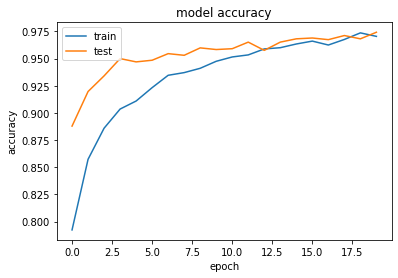

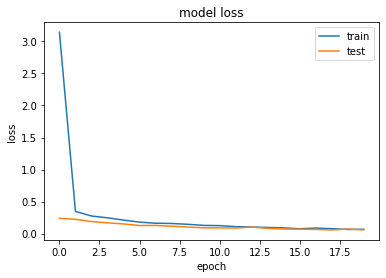

In [103]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [109]:

print("Validation Accuracy is:",score[1])

Validation Accuracy is: 0.9742424488067627


In [117]:
print("Validation Loss is :",score[0])

Validation Loss is : 0.05850136652588844


In [114]:
print("Recall score:",recall_score(Ytest,model.predict_classes(x_test),))

Recall score: 0.9217877094972067


In [115]:
print("F1_score:",f1_score(Ytest,model.predict_classes(x_test),))

F1_score: 0.9065934065934066
